#  Introducción a las series Temporales

## 0. Objetivo

</img>El objetivo de este proyecto es realizar el análisis de una serie temporal y eliminar sus componentes de estacionalidad y tendencia.Vamos a utilizar el dataset de los alquileres de bicicletas de Chicago, pero en este caso utilizaremos como serie temporal el número de **alquileres de los usuarios registrados**.Además, realizaremos el análisis con los **datos a nivel horario**, es decir: sin agrupar.

## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
## Definimos las variables para determinar el tamaño de las gráficas
fig_size = (18,6)
fig_size_subplot = (14,7)

## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe con la serie temporal que incluya nuestra variable tiempo y el número de alquileres de usuarios registrados.

In [164]:
## Carga del fichero
df = pd.read_csv("hour_chicago.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_str    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.9+ MB


In [165]:
df

,date_str,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,0.26,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,0.26,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,0.26,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,0.26,0.56,0.1343,13,48,61


In [166]:
## Creación de la variable tiempo
df['date_hr'] = (df['date_str'] 
                       + ' ' 
                       + df['hr'].astype(str).str.zfill(2) 
                       + ':00:00')


df['date'] = pd.to_datetime(df['date_hr'], format='%Y-%m-%d %H:%M:%S')

In [167]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,date
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599,NaN


In [168]:
## Creación del dataframe con nuestra serie temporal
df.index = df["date"]
df = df[["registered"]]
df

,registered
date,
2011-01-01 00:00:00,13
2011-01-01 01:00:00,32
2011-01-01 02:00:00,27
2011-01-01 03:00:00,10
2011-01-01 04:00:00,1
...,...
2012-12-31 19:00:00,108
2012-12-31 20:00:00,81
2012-12-31 21:00:00,83


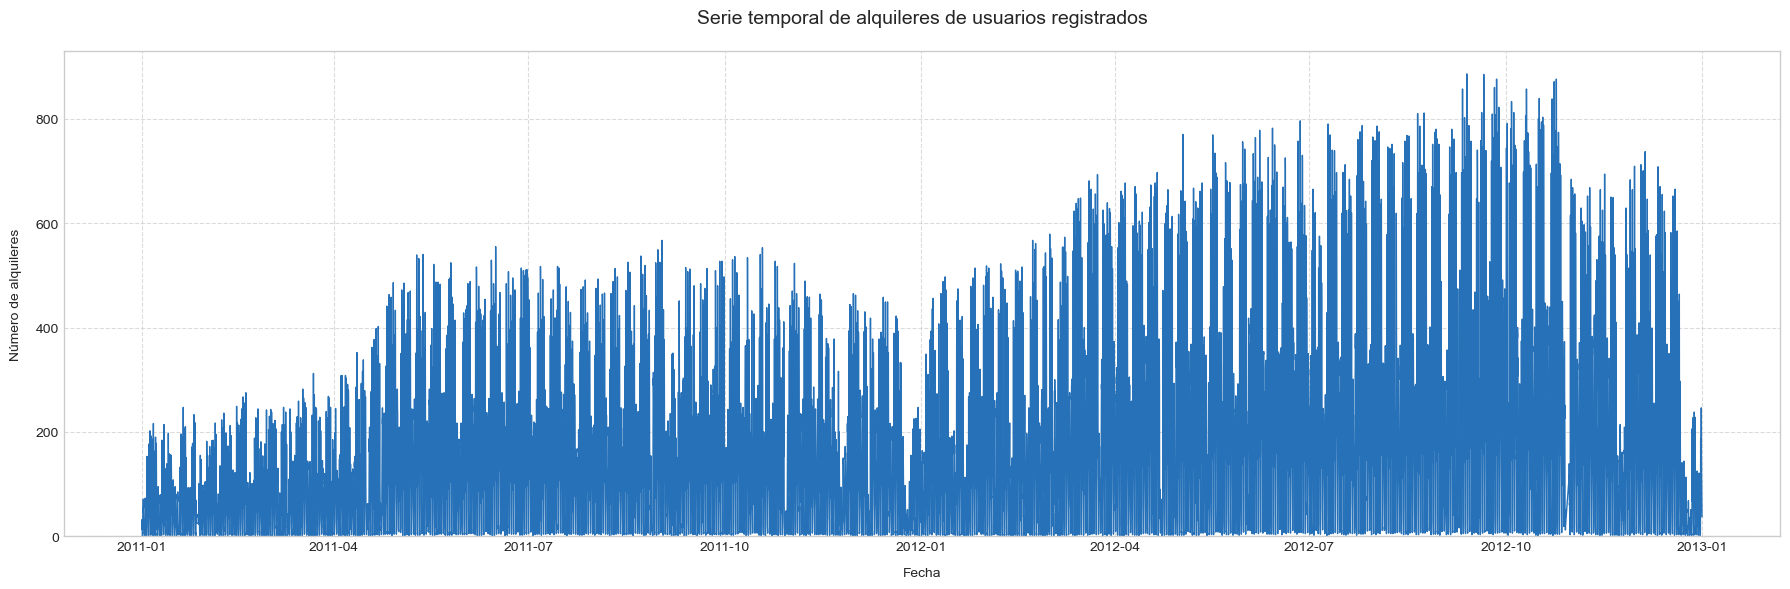

In [169]:
## Visualización de nuestra serie temporal

plt.figure(figsize=fig_size)
plt.plot(df.index, df['registered'], linewidth=1, color='#2671b8')
plt.title('Serie temporal de alquileres de usuarios registrados', pad=20, fontsize=14)
plt.xlabel('Fecha', labelpad=10)
plt.ylabel('Número de alquileres', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites del eje y eliminando espacio en blanco
plt.ylim(bottom=0)  # Empieza desde 0
ymax = df['registered'].max() * 1.05  # 5% de margen superior
plt.ylim(top=ymax)

plt.tight_layout()
plt.show()

## 3. Componentes de una serie temporal

**P: ¿Qué componentes tiene nuestra serie temporal?**

In [170]:
# Analizando el gráfico de la serie temporal completa se observan:

# 1. Tendencia: 
# - Clara tendencia creciente desde 2011 hasta finales de 2012
# - Se ve en el aumento progresivo de los valores máximos (de ~400 a ~800 alquileres)

# 2. Estacionalidad:
# - Se observan patrones repetitivos a lo largo del tiempo
# - Hay picos y valles que se repiten regularmente
# - La amplitud de estos patrones es mayor en 2012 que en 2011

# 3. Componente aleatorio:
# - Variaciones irregulares en los picos y valles
# - No siguen un patrón específico, podrian ser debidos a factores externos impredecibles (como clima, eventos extraordinarios, etc.) 

**P: ¿Hay más de un tipo de estacionalidad?**

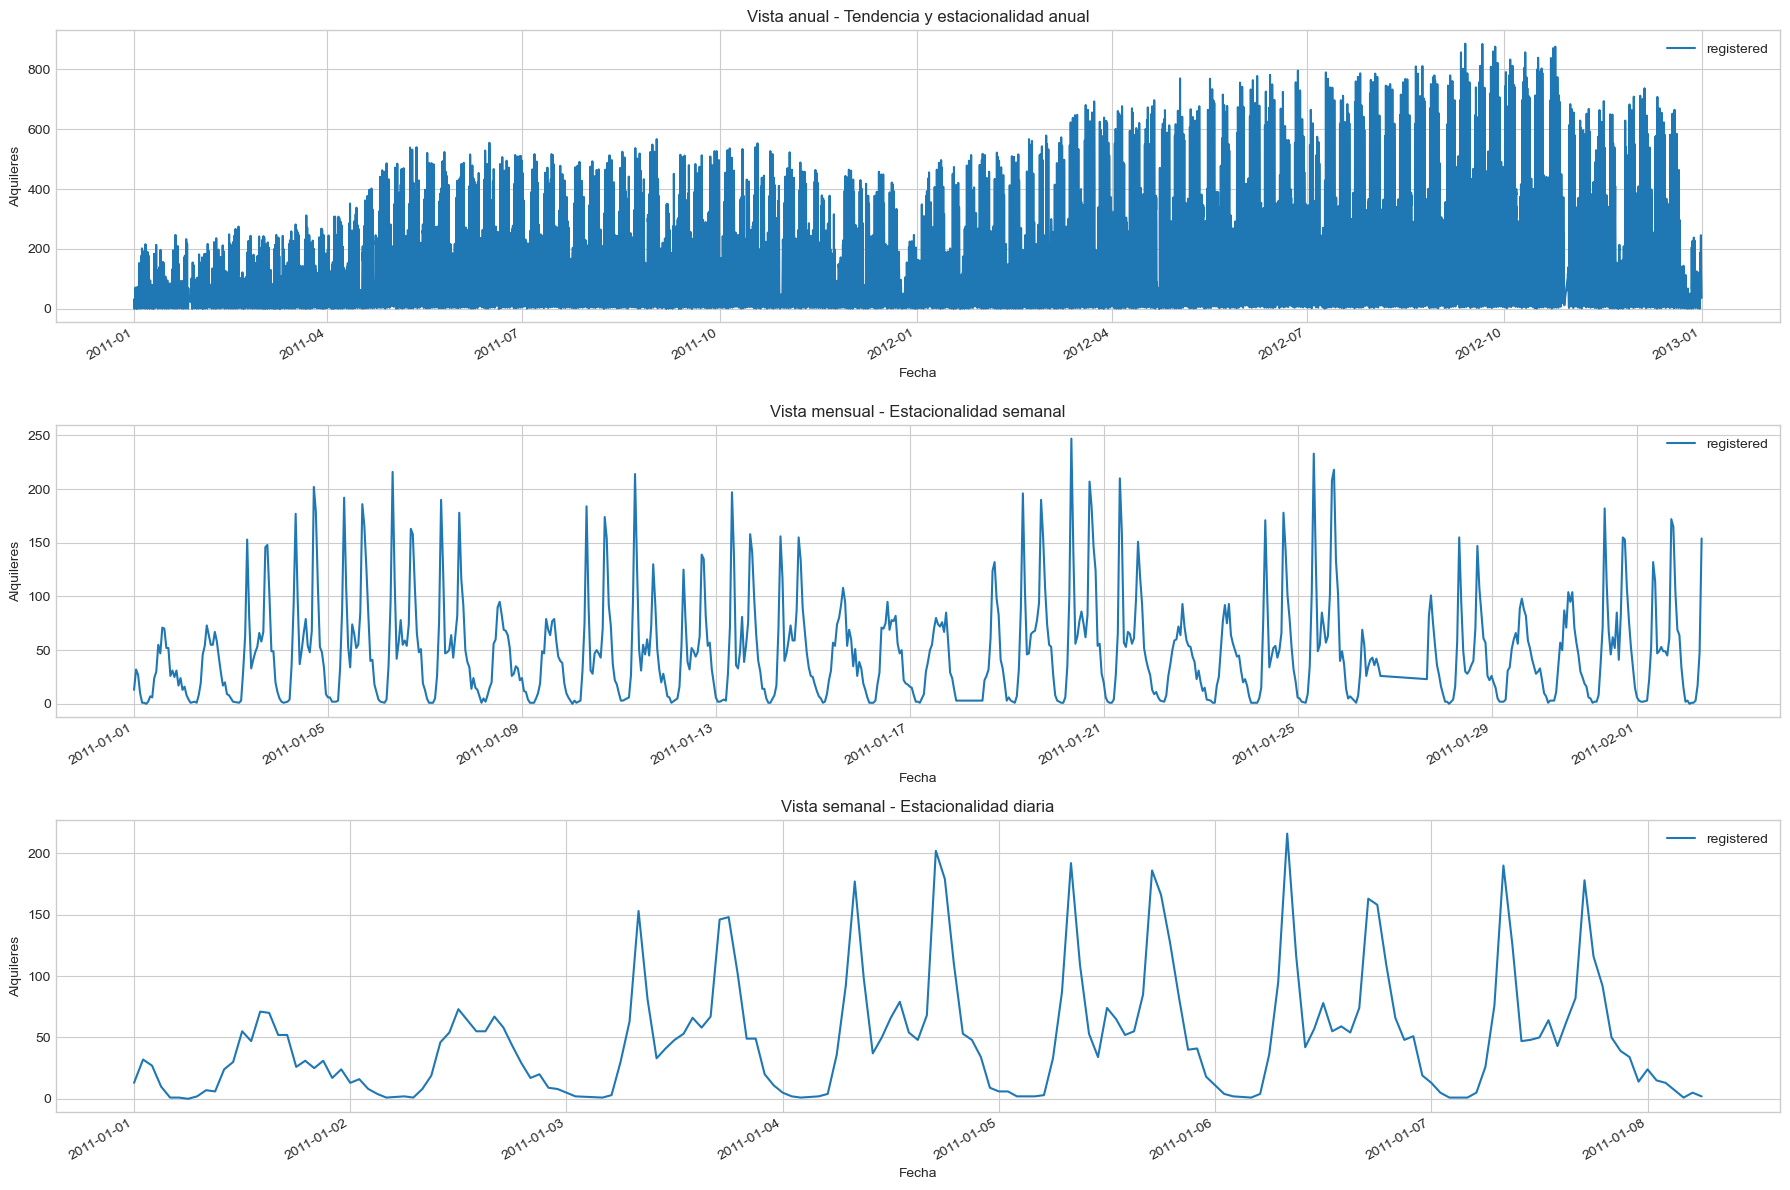

In [171]:
# Visualizamos diferentes ventanas temporales para ver los componentes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 12))

# Vista anual - para ver tendencia y estacionalidad anual
df.plot(y='registered', ax=ax1, title='Vista anual - Tendencia y estacionalidad anual')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Alquileres')

# Vista mensual - para ver estacionalidad semanal
df[:30*24].plot(y='registered', ax=ax2, title='Vista mensual - Estacionalidad semanal')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Alquileres')

# Vista semanal - para ver estacionalidad diaria
df[:7*24].plot(y='registered', ax=ax3, title='Vista semanal - Estacionalidad diaria')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Alquileres')

plt.tight_layout()
plt.show()

In [172]:
# Analizando las tres vistas de la serie temporal, se observan claramente tres tipos de estacionalidad:

# 1. Estacionalidad diaria (vista semanal):
# - Se observan picos que se repiten cada día
# - Dos picos principales por día (probablemente horas punta de mañana y tarde)
# - Valores mínimos en las horas nocturnas
# - Patrón que se repite cada 24 horas

# 2. Estacionalidad semanal (vista mensual):
# - Patrones que se repiten cada 7 días
# - Se observan diferencias entre días laborables (picos más altos)
# - Menor uso en fines de semana (picos más bajos)

# 3. Estacionalidad anual (vista anual):
# - Mayor uso en meses cálidos (verano)
# - Menor uso en meses fríos (invierno)
# - Se puede ver en la amplitud de las oscilaciones que varía según la época del año

### 3.1. Si existe componente estacional, elimínala y representa los resultados.

In [173]:
# 3.1 Eliminar componente estacional

# Calculamos la media móvil de 24 horas para eliminar la estacionalidad diaria
df['MA24'] = df['registered'].rolling(window=24, center=True).mean()  # Media móvil de 24h para estacionalidad diaria
df['MA168'] = df['registered'].rolling(window=168, center=True).mean()  # Media móvil de 168h (7*24) para estacionalidad semanal


/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_13874/767409291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA24'] = df['registered'].rolling(window=24, center=True).mean()  # Media móvil de 24h para estacionalidad diaria
/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_13874/767409291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA168'] = df['registered'].rolling(window=168, center=True).mean()  # Media móvil de 168h (7*24) para estacionalidad semanal


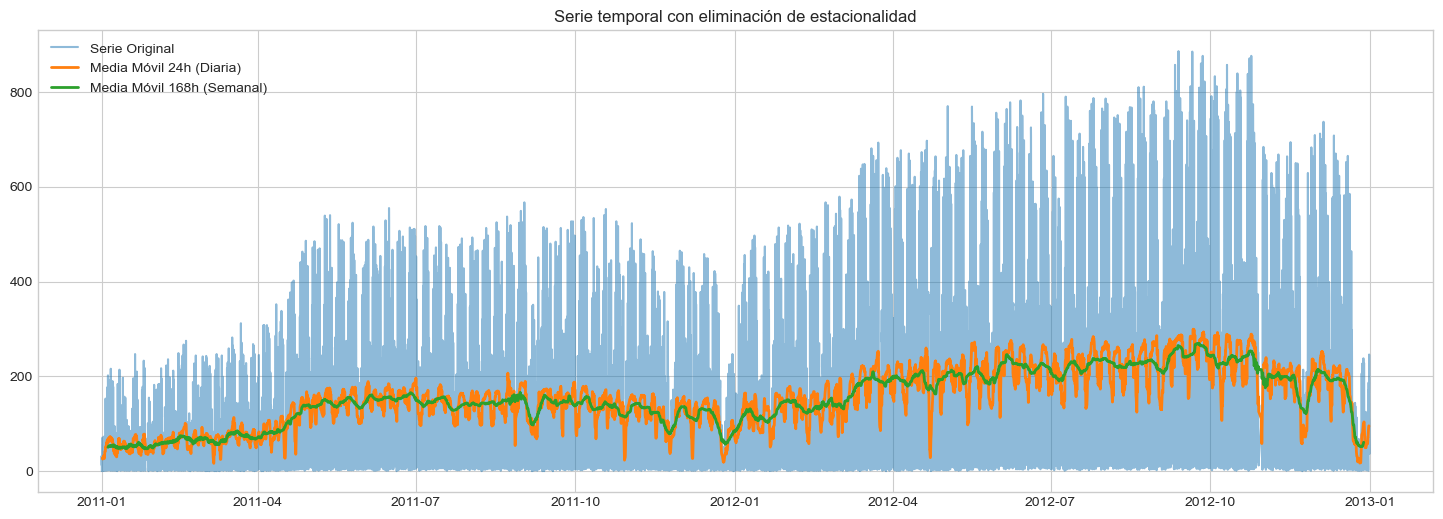

In [174]:
# Visualizamos los resultados

plt.figure(figsize=fig_size)
plt.plot(df.index, df['registered'], label='Serie Original', alpha=0.5)
plt.plot(df.index, df['MA24'], label='Media Móvil 24h (Diaria)', linewidth=2)
plt.plot(df.index, df['MA168'], label='Media Móvil 168h (Semanal)', linewidth=2)
plt.title('Serie temporal con eliminación de estacionalidad')
plt.legend()
plt.show()

### 3.2. Si existe tendencia, elimínala y representa los resultados.

In [180]:
# 3.2 Eliminar tendencia
df.loc[:, 'Sin_tendencia'] = df['MA168'].diff()


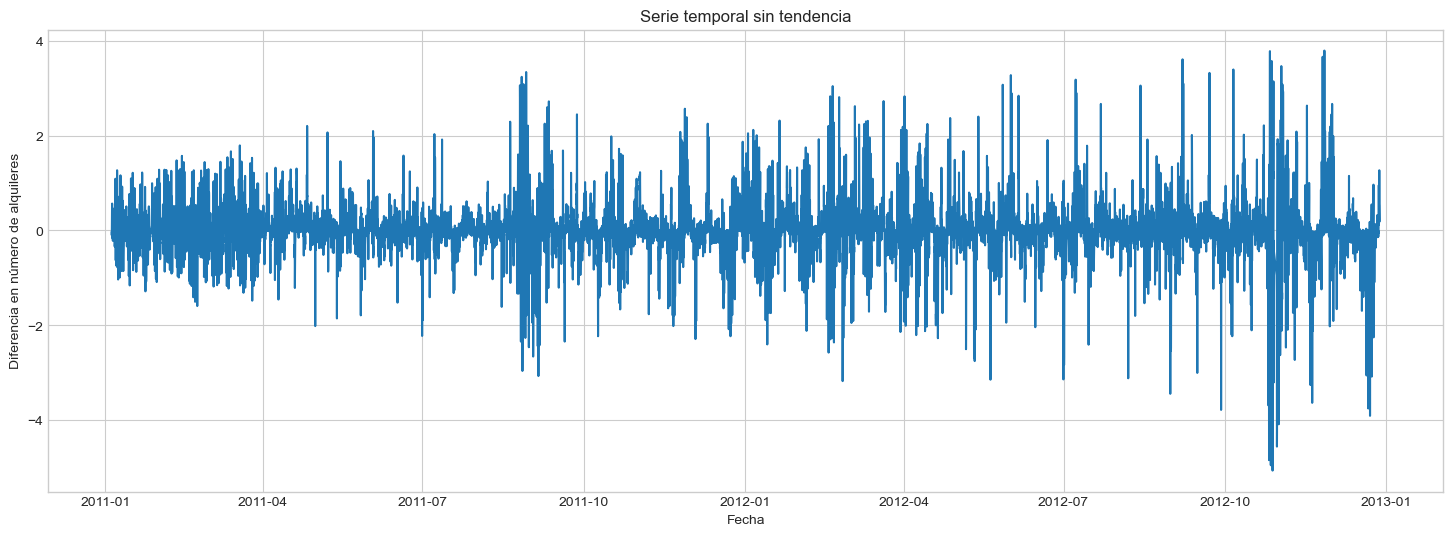

In [181]:
plt.figure(figsize=fig_size)
plt.plot(df.index, df['Sin_tendencia'])
plt.title('Serie temporal sin tendencia')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en número de alquileres')
plt.show()

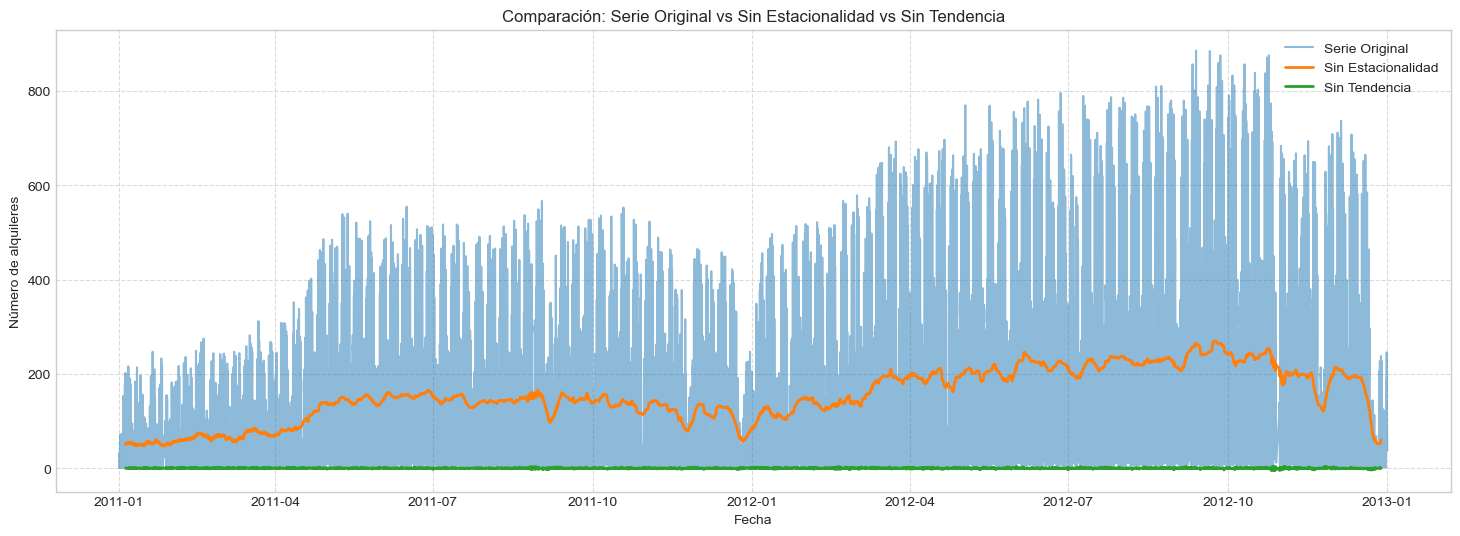

In [184]:
# Visualizamos la serie sin estacionalidad y sin tendencia juntas
plt.figure(figsize=fig_size)
plt.plot(df.index, df['registered'], label='Serie Original', alpha=0.5)
plt.plot(df.index, df['MA168'], label='Sin Estacionalidad', linewidth=2)
plt.plot(df.index, df['Sin_tendencia'], label='Sin Tendencia', linewidth=2)
plt.title('Comparación: Serie Original vs Sin Estacionalidad vs Sin Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Número de alquileres')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

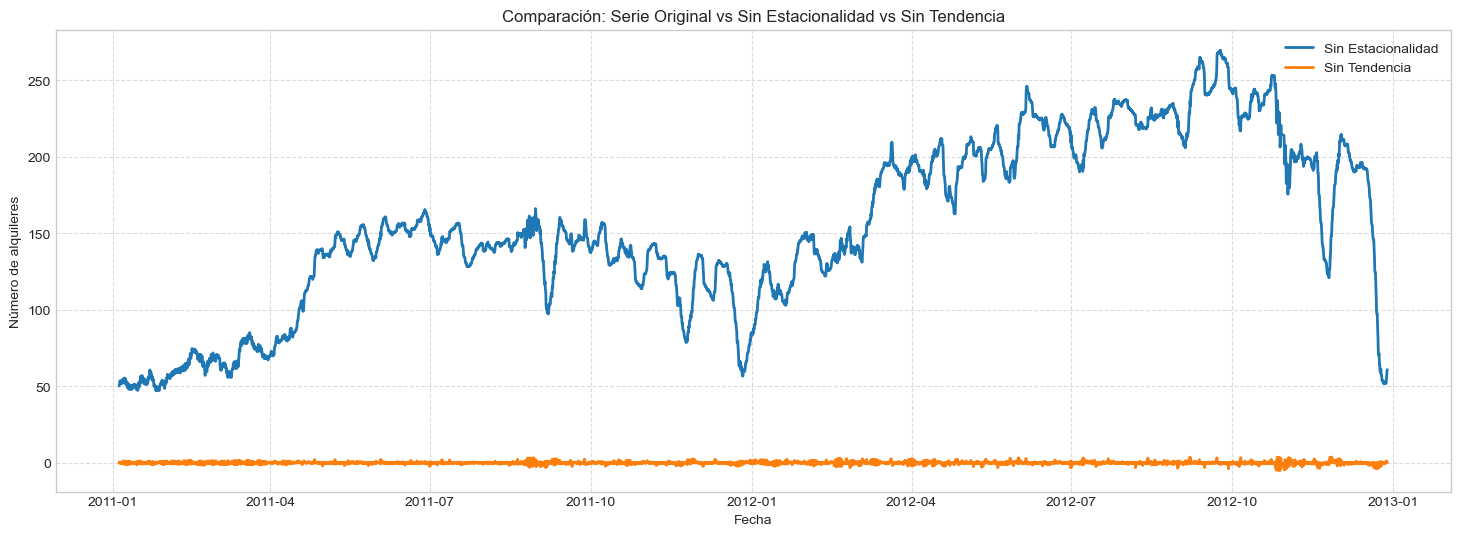

In [186]:
# Visualizamos la serie sin estacionalidad y sin tendencia juntas
plt.figure(figsize=fig_size)
#plt.plot(df.index, df['registered'], label='Serie Original', alpha=0.5)
plt.plot(df.index, df['MA168'], label='Sin Estacionalidad', linewidth=2)
plt.plot(df.index, df['Sin_tendencia'], label='Sin Tendencia', linewidth=2)
plt.title('Comparación: Serie Original vs Sin Estacionalidad vs Sin Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Número de alquileres')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()